# Heart Attack Analysis Prediction in India

# Introduction

Heart disease continues to be one of the major public health concerns in India, contributing significantly to mortality and healthcare costs. The Heart Attack Prediction (India) Dataset has been designed to analyze key health, lifestyle, and environmental factors influencing the likelihood of heart attacks among individuals from different Indian states.

This dataset contains 10,000 patient records, each representing demographic, behavioral, and medical attributes along with a final label — Heart_Attack_Risk — indicating whether the individual is likely to experience a heart attack.

# Problem Statement

The aim of this study is to develop a reliable classification model that can predict the likelihood of a patient experiencing a heart attack based on their clinical parameters. By accurately identifying individuals at risk, healthcare providers can intervene early with targeted interventions and lifestyle modifications to reduce the risk of heart disease and improve patient outcomes.

# Load libraries 

In [43]:

import numpy as np         
import pandas as pd    
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder 

# Load Dataset

First, load the supplied CSV file using additional options in the Pandas **`read_csv`** function. 

In [44]:
df = pd.read_csv("E:\Data_Science\Project\ML_project1\heart_attack_prediction_india.csv", index_col=False)

# Inspecting the data
The first step is to visually inspect the new data set. There are multiple ways to achieve this:
* The easiest being to request the first few records using the DataFrame **`data.head()`** method. By default, **`data.head()`** returns the first 5 rows from the DataFrame object df (excluding the header row). 
* Alternatively, one can also use **`df.tail()`** to return the five rows of the data frame. 
* For both head and  tail methods, there is an option to specify the number of records by including the required number in between the parentheses when calling either method.Inspecting the data

In [45]:
df.head()

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0,9,0,0,209,97987,0,1


In [46]:
df.tail()

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
9995,9996,Maharashtra,20,Female,0,0,0,1,0,1,...,74,1,1,10,0,0,167,1175023,1,0
9996,9997,Rajasthan,34,Female,0,0,0,0,0,0,...,78,0,1,1,0,0,123,999441,0,1
9997,9998,Gujarat,76,Male,0,0,0,0,0,0,...,98,1,0,1,0,1,376,159536,0,0
9998,9999,Andhra Pradesh,52,Male,0,0,0,0,0,1,...,60,1,0,7,1,0,313,153207,0,0
9999,10000,Haryana,25,Female,0,1,0,1,0,1,...,89,1,0,4,0,1,366,1732794,1,0


You can check the number of cases, as well as the number of fields, using the shape method, as shown below.

In [47]:
df.shape

(10000, 26)

In the result displayed, you can see the data has 10000 records, each with 26 columns.

The **`info()`** method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.



In [48]:
# Review data types with "info()".
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Patient_ID               10000 non-null  int64 
 1   State_Name               10000 non-null  object
 2   Age                      10000 non-null  int64 
 3   Gender                   10000 non-null  object
 4   Diabetes                 10000 non-null  int64 
 5   Hypertension             10000 non-null  int64 
 6   Obesity                  10000 non-null  int64 
 7   Smoking                  10000 non-null  int64 
 8   Alcohol_Consumption      10000 non-null  int64 
 9   Physical_Activity        10000 non-null  int64 
 10  Diet_Score               10000 non-null  int64 
 11  Cholesterol_Level        10000 non-null  int64 
 12  Triglyceride_Level       10000 non-null  int64 
 13  LDL_Level                10000 non-null  int64 
 14  HDL_Level                10000 non-null

In [49]:
# Check for missing variables
print(df.isnull().sum())

Patient_ID                 0
State_Name                 0
Age                        0
Gender                     0
Diabetes                   0
Hypertension               0
Obesity                    0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity          0
Diet_Score                 0
Cholesterol_Level          0
Triglyceride_Level         0
LDL_Level                  0
HDL_Level                  0
Systolic_BP                0
Diastolic_BP               0
Air_Pollution_Exposure     0
Family_History             0
Stress_Level               0
Healthcare_Access          0
Heart_Attack_History       0
Emergency_Response_Time    0
Annual_Income              0
Health_Insurance           0
Heart_Attack_Risk          0
dtype: int64


# Exploratory Data Analysis

Now that we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values. In this section, I am getting familiar with the data, which will provide useful knowledge for data pre-processing.

## Objectives of Data Exploration
Exploratory data analysis (EDA) is a very important step which takes place after feature engineering and acquiring data and it should be done before any modeling. This is because it is very important for a data scientist to be able to understand the nature of the data without making assumptions. The results of data exploration can be extremely useful in grasping the structure of the data, the distribution of the values, and the presence of extreme values and interrelationships within the data set.
> **The purpose of EDA is:**
* to use summary statistics and visualizations to better understand data, 
*find clues about the tendencies of the data, its quality and to formulate assumptions and the hypothesis of our analysis
* For data preprocessing to be successful, it is essential to have an overall picture of your data
Basic statistical descriptions can be used to identify properties of the data and highlight which data values should be treated as noise or outliers.** 

Next step is to explore the data. There are two approached used to examine the data using:

1. ***Descriptive statistics*** is the process of condensing key characteristics of the data set into simple numeric metrics. Some of the common metrics used are mean, standard deviation, and correlation. 
	
2. ***Visualization*** is the process of projecting the data, or parts of it, into Cartesian space or into abstract images. In the data mining process, data exploration is leveraged in many different steps including preprocessing, modeling, and interpretation of results. 

In [50]:
#basic descriptive statistics
df.describe()

,Patient_ID,Age,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,5000.50000,49.394900,0.092900,0.24690,0.303700,0.301400,0.352800,0.595800,5.021700,224.753000,...,89.312000,0.403600,0.311300,5.518800,0.311000,0.152500,206.383400,1.022062e+06,0.344700,0.300700
std,2886.89568,17.280301,0.290307,0.43123,0.459878,0.458889,0.477865,0.490761,3.156394,43.359172,...,17.396486,0.490644,0.463048,2.866264,0.462926,0.359523,112.391711,5.605978e+05,0.475294,0.458585
min,1.00000,20.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,...,60.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000,5.035300e+04,0.000000,0.000000
25%,2500.75000,35.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,187.000000,...,74.000000,0.000000,0.000000,3.000000,0.000000,0.000000,110.000000,5.357838e+05,0.000000,0.000000
50%,5000.50000,49.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,5.000000,226.000000,...,89.000000,0.000000,0.000000,6.000000,0.000000,0.000000,206.000000,1.021383e+06,0.000000,0.000000
75%,7500.25000,64.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,8.000000,262.000000,...,104.000000,1.000000,1.000000,8.000000,1.000000,0.000000,304.000000,1.501670e+06,1.000000,1.000000
max,10000.00000,79.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,10.000000,299.000000,...,119.000000,1.000000,1.000000,10.000000,1.000000,1.000000,399.000000,1.999714e+06,1.000000,1.000000


# Define features (X) and target (y)

In [51]:
X = df.drop(columns=['Heart_Attack_Risk'])
y = df['Heart_Attack_Risk']


# Random Forest

In [ ]:
# Import required libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv("E:\Data_Science\Project\ML_project1\heart_attack_prediction_india.csv")

# Drop unnecessary columns (like Patient_ID)
if 'Patient_ID' in data.columns:
    data = data.drop('Patient_ID', axis=1)

# Encode categorical columns
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

# Define features and target
X = data.drop('Heart_Attack_Risk', axis=1)
y = data['Heart_Attack_Risk']

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest model
classifier = RandomForestClassifier(
    n_estimators=100,      
    criterion='entropy',
    random_state=42
)
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Evaluation metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

accuracy = accuracy_score(y_test, y_pred)
score_rf = accuracy * 100 
print("Random Forest Accuracy: %.2f%%" % score_rf)


Mean Absolute Error: 0.295
Mean Squared Error: 0.295
Root Mean Squared Error: 0.5431390245600107
Random Forest Accuracy: 70.50%


# K-Nearest Neighbors (KNN)

In [ ]:

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
data = pd.read_csv("E:\\Data_Science\\Project\\ML_project1\\heart_attack_prediction_india.csv")

# Drop unnecessary ID column
if 'Patient_ID' in data.columns:
    data = data.drop('Patient_ID', axis=1)

# Encode categorical columns
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

# Define features (X) and target (y)
X = data.drop('Heart_Attack_Risk', axis=1)
y = data['Heart_Attack_Risk']

# Split dataset into train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


print("Feature Columns:", list(X.columns))

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Evaluation
print("\n=== KNN Model Evaluation ===")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
score_knn = accuracy_score(y_test, y_pred) * 100  
print("KNN Accuracy: %.2f%%" % score_knn)

# Realistic Test Input
new_data = {
    'State_Name': 'Karnataka',
    'Age': 45,
    'Gender': 'Male',
    'Diabetes': 1,
    'Hypertension': 0,
    'Obesity': 1,
    'Smoking': 0,
    'Alcohol_Consumption': 0,
    'Physical_Activity': 1,
    'Diet': 1,
    'Systolic_BP': 130,
    'Diastolic_BP': 85,
    'Air_Pollution_Exposure': 1,
    'Family_History': 1,
    'Stress_Level': 6,
    'Healthcare_Access': 0,
    'Heart_Attack_History': 0,
    'Emergency_Response_Time': 180,
    'Annual_Income': 250000,
    'Health_Insurance': 1
}

new_df = pd.DataFrame([new_data])
for col in new_df.select_dtypes(include=['object']).columns:
    new_df[col] = le.fit_transform(new_df[col])
new_df = new_df.reindex(columns=X.columns, fill_value=0)
new_scaled = scaler.transform(new_df)
prediction = classifier.predict(new_scaled)
print("Predicted Heart Attack Risk (0 = No Risk, 1 = Risk):", int(prediction[0]))


Feature Columns: ['State_Name', 'Age', 'Gender', 'Diabetes', 'Hypertension', 'Obesity', 'Smoking', 'Alcohol_Consumption', 'Physical_Activity', 'Diet_Score', 'Cholesterol_Level', 'Triglyceride_Level', 'LDL_Level', 'HDL_Level', 'Systolic_BP', 'Diastolic_BP', 'Air_Pollution_Exposure', 'Family_History', 'Stress_Level', 'Healthcare_Access', 'Heart_Attack_History', 'Emergency_Response_Time', 'Annual_Income', 'Health_Insurance']

=== KNN Model Evaluation ===
Mean Absolute Error: 0.375
Mean Squared Error: 0.375
Root Mean Squared Error: 0.6123724356957945
KNN Accuracy: 62.50%
Predicted Heart Attack Risk (0 = No Risk, 1 = Risk): 0


# Support Vector Machine (SVM)

In [ ]:

# Import Required Libraries

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error


# Load and Preprocess Dataset

data = pd.read_csv("E:\Data_Science\Project\ML_project1\heart_attack_prediction_india.csv")

# Drop ID column if present
if 'Patient_ID' in data.columns:
    data = data.drop('Patient_ID', axis=1)

# Encode categorical columns
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

# Define features and target
X = data.drop('Heart_Attack_Risk', axis=1)
y = data['Heart_Attack_Risk']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM Classifier

classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(X_train, y_train)


# Evaluate Model

y_pred = classifier.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

accuracy = accuracy_score(y_test, y_pred)
score_svm = accuracy * 100  
print("SVM Accuracy: %.2f%%" % score_svm)


# Realistic Test Input Generator
# Display required input feature names
print("\n Enter new patient details in the order \n")
print(list(X.columns))

# Example input 
new_data = {
    'State_Name': 'Karnataka',  
    'Age': 45,
    'Gender': 'Male',
    'Diabetes': 1,
    'Hypertension': 0,
    'Obesity': 1,
    'Smoking': 0,
    'Alcohol_Consumption': 0,
    'Physical_Activity': 1,
    'Diet': 1,
    'Systolic_BP': 130,
    'Diastolic_BP': 85,
    'Air_Pollution_Exposure': 1,
    'Family_History': 1,
    'Stress_Level': 6,
    'Healthcare_Access': 0,
    'Heart_Attack_History': 0,
    'Emergency_Response_Time': 180,
    'Annual_Income': 250000,
    'Health_Insurance': 1
}

# Convert dictionary to DataFrame
new_df = pd.DataFrame([new_data])

# Encode categorical columns same as training
for col in new_df.select_dtypes(include=['object']).columns:
    new_df[col] = le.fit_transform(new_df[col])

# Align columns 
new_df = new_df.reindex(columns=X.columns, fill_value=0)

# Scale input
new_scaled = scaler.transform(new_df)

# Predict
prediction = classifier.predict(new_scaled)
print("\nPredicted Heart Attack Risk (0 = No Risk, 1 = Risk):", int(prediction[0]))


Mean Absolute Error: 0.2945
Mean Squared Error: 0.2945
Root Mean Squared Error: 0.5426785420486054
SVM Accuracy: 70.55%

 Enter new patient details in this order 

['State_Name', 'Age', 'Gender', 'Diabetes', 'Hypertension', 'Obesity', 'Smoking', 'Alcohol_Consumption', 'Physical_Activity', 'Diet_Score', 'Cholesterol_Level', 'Triglyceride_Level', 'LDL_Level', 'HDL_Level', 'Systolic_BP', 'Diastolic_BP', 'Air_Pollution_Exposure', 'Family_History', 'Stress_Level', 'Healthcare_Access', 'Heart_Attack_History', 'Emergency_Response_Time', 'Annual_Income', 'Health_Insurance']

Predicted Heart Attack Risk (0 = No Risk, 1 = Risk): 0


# OUTPUT FINAL SCORE


In [55]:
results = {
    'scores': [score_rf, score_knn, score_svm],
    'algorithms': ["Random Forest", "K-Nearest Neighbors", "Support Vector Regression"]
}

results_df = pd.DataFrame(results)
print(results_df)


   scores                 algorithms
0   70.50              Random Forest
1   62.50        K-Nearest Neighbors
2   70.55  Support Vector Regression


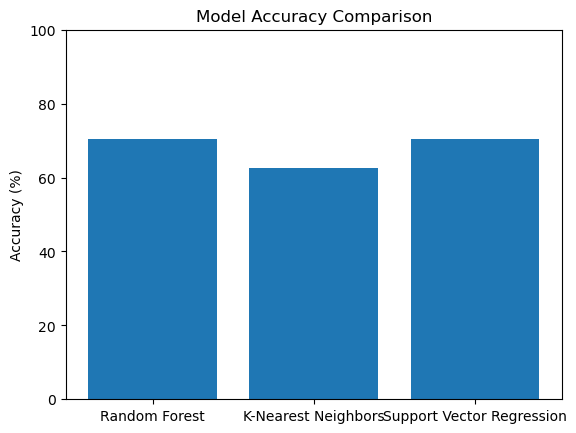

In [56]:
plt.bar(results_df['algorithms'], results_df['scores'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()
